In [1]:
import xarray as xr
import dask
from xmitgcm import open_mdsdataset
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.cm as pcm
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.ticker as mticker
import matplotlib.colors as col
import cmocean.cm as cm
from colorspace.colorlib import HCL
from colorspace import diverging_hcl, sequential_hcl
from matplotlib import rc, rcParams
# rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
rcParams.update({"text.usetex": True})
rc('xtick', labelsize=15) 
rc('ytick', labelsize=15) 
rc('axes', labelsize=15)
import cmaps

In [3]:
rootdir = '/export/data1/rmoorman/GRACE-GRACEFO/'
ds = xr.open_dataset(rootdir+'CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc')

In [5]:
lwe_thickness = ds.lwe_thickness
# need to convert time dimension later if desired

In [7]:
ds

<xarray.Dataset>
Dimensions:        (lat: 720, lon: 1440, time: 196, timebound: 2)
Coordinates:
  * time           (time) float32 107.0 129.5 227.5 ... 7.014e+03 7.045e+03
  * lon            (lon) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * lat            (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 94.0 120.0 ... 7.03e+03 7.06e+03
    lwe_thickness  (time, lat, lon) float32 ...
Attributes: (12/58)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL06_Mascons_all-co...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL06Mv2
    subtitle:                   GRACE/GRACE-FO Total water storage with all c...
    ...                         ...
    user_note_2:                The accelerometer on the GRACE-FO 2 spacecraf...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    date_created:               2021-06-22T15:34:56Z
    variable:                   liquid water equivalent thickness
    label:                      RL06rc24cE
    Mask:                       Global

In [6]:
lwe_thickness

<xarray.DataArray 'lwe_thickness' (time: 196, lat: 720, lon: 1440)>
[203212800 values with dtype=float32]
Coordinates:
  * time     (time) float32 107.0 129.5 227.5 ... 6.985e+03 7.014e+03 7.045e+03
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Attributes:
    grid_mapping:   WGS84
    standard_name:  Liquid_Water_Equivalent_Thickness
    long_name:      Liquid_Water_Equivalent_Thickness
    Units:          cm

In [8]:
def global_ocean_mascon_map(ds, vmin, vmax, colormap,central_longitude=0):
    ax = plt.subplot(projection=ccrs.PlateCarree(central_longitude))
    ax.set_global();
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.75, color='gray', alpha=0.5, linestyle='--') # add lon/lat grid lines
    mascons = ax.pcolormesh(ds.lon, ds.lat, ds.lwe_thickness, vmin=vmin, vmax=vmax, cmap=colormap, transform=ccrs.PlateCarree())
#     ax.contourf(landmask.lon, landmask.lat,landmask.where(landmask==1),colors=['darkgrey'],transform=ccrs.PlateCarree())
    return mascons

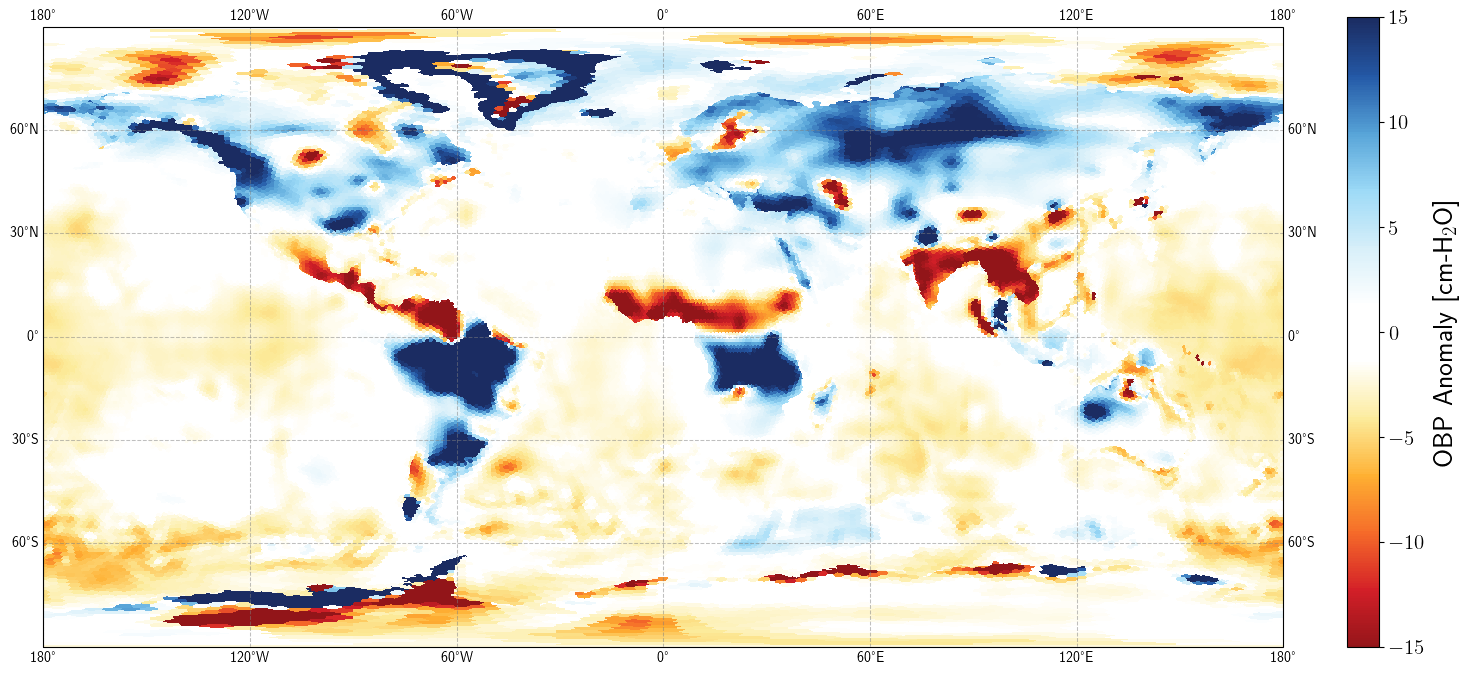

In [10]:
fig = plt.figure(figsize=(16,9))
cs = global_ocean_mascon_map(ds.isel(time=0),vmin=-15, vmax=15, colormap=cmaps.BlueWhiteOrangeRed_r)
cax = fig.add_axes([0.94, 0.15, 0.02, 0.7])
cbar=plt.colorbar(cs,cax = cax,orientation='vertical')
cbar.set_label('OBP Anomaly [cm-H$_2$O]', fontsize = 20)
plt.show()